In [1]:
import xesmf
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime
import os.path
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from PIL import Image
from glob import glob
import sys
import cmocean.cm as cmo
import time
import matplotlib.image as image
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [3]:
# def get_eke_mke(u,v):
# u = ds.SSU[:,:,:].values
# v = ds.SSV[:,:,:].values

# u = u[:,:,:-1]
# v = v[:,:-1,:]

# u2 = u * u
# v2 = v * v

# uavg = u.mean(axis=0)
# vavg = v.mean(axis=0)

# eke = 0.5 * ((u - uavg)**2 + (v - vavg)**2)
# mke = 0.5 * (u2 + v2) 
# return eke, mke

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [4]:
in_dir  = '/glade/work/gseijo/CARIB_025.004.glofas_proc/'
out_dir_eke = '/glade/work/gseijo/CARIB_025.004.glofas_proc/eke_mke/'
out_dir_mld = '/glade/work/gseijo/CARIB_025.004.glofas_proc/mld/'

case_name = 'CARIB_025.004.glofas'

out_name_mean_eke_mom = case_name + '_mom_mean_eke_sfc.png'
out_name_mean_mke_mom = case_name + '_mom_mean_mke_sfc.png'

out_name_mean_eke_glorys = 'glorys_mean_eke_sfc.png'
out_name_mean_mke_glorys = 'glorys_mean_mke_sfc.png'

out_name_mean_eke_dif_glorys_mom = case_name + '_glorys_mean_eke_diff.png'
out_name_mean_mke_dif_glorys_mom = case_name + '_glorys_mean_mke_diff.png'

out_name_eke_mom_djf = case_name + '_mom_eke_djf.png'
out_name_eke_mom_mam = case_name + '_mom_eke_mam.png'
out_name_eke_mom_jja = case_name + '_mom_eke_jja.png'
out_name_eke_mom_son = case_name + '_mom_eke_son.png'
out_name_eke_mom_TS = case_name + '_mom_eke_TS.png'
out_name_eke_mom_TS_carib = case_name + '_mom_eke_TS_carib.png'

earth = 'bluemarble.png'

ds = xr.open_dataset(in_dir + 'CARIB_025.004.glofas.mom6.sfc_2000.nc')
ds

<xarray.Dataset>
Dimensions:       (nv: 2, time: 365, xh: 252, xq: 253, yh: 152, yq: 153)
Coordinates:
  * xh            (xh) float64 -98.38 -98.12 -97.88 ... -36.12 -35.88 -35.62
  * yh            (yh) float64 -5.875 -5.625 -5.375 -5.125 ... 31.38 31.62 31.88
  * time          (time) datetime64[ns] 1999-12-30T12:00:00 ... 2000-12-28T12...
  * nv            (nv) float64 1.0 2.0
  * xq            (xq) float64 -98.5 -98.25 -98.0 -97.75 ... -36.0 -35.75 -35.5
  * yq            (yq) float64 -6.0 -5.75 -5.5 -5.25 ... 31.25 31.5 31.75 32.0
Data variables: (12/16)
    SSH           (time, yh, xh) float64 ...
    tos           (time, yh, xh) float64 ...
    sos           (time, yh, xh) float64 ...
    SSU           (time, yh, xq) float64 ...
    SSV           (time, yq, xh) float64 ...
    mass_wt       (time, yh, xh) float64 ...
    ...            ...
    mlotst        (time, yh, xh) float64 ...
    oml           (time, yh, xh) float64 ...
    average_T1    (time) datetime64[ns] ...
    average_T2    (time) datetime64[ns] ...
    average_DT    (time) timedelta64[ns] ...
    time_bnds     (time, nv) timedelta64[ns] ...
Attributes:
    filename:          CARIB_025.004.glofas.mom6.sfc_2000.nc
    title:             MOM6 diagnostic fields table for CESM case: CARIB_025....
    associated_files:  area_t: CARIB_025.004.glofas.mom6.static.nc
    grid_type:         regular
    grid_tile:         N/A

In [5]:
#def get_eke_mke(u,v):

u = ds.SSU[:,:,:].values
v = ds.SSV[:,:,:].values

u = u[:,:,:-1]
v = v[:,:-1,:]

u2 = u * u
v2 = v * v

uavg = u.mean(axis=0)
vavg = v.mean(axis=0)

eke = 0.5 * ((u - uavg)**2 + (v - vavg)**2)
mke = 0.5 * (u2 + v2)   
        
        #return eke,mke

In [6]:
#EKE,MKE = get_eke(ds.SSU[:,:,:].values,ds.SSV[:,:,:].values)
eke_avg = eke.mean(axis=0)
mke_avg = mke.mean(axis=0)                           

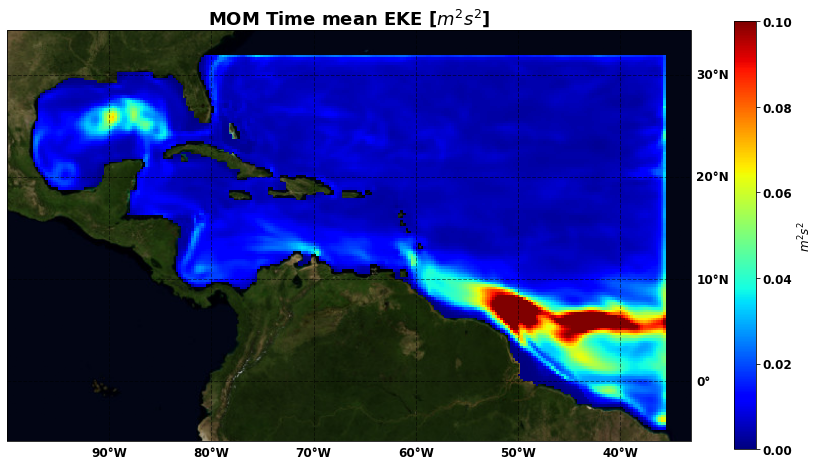

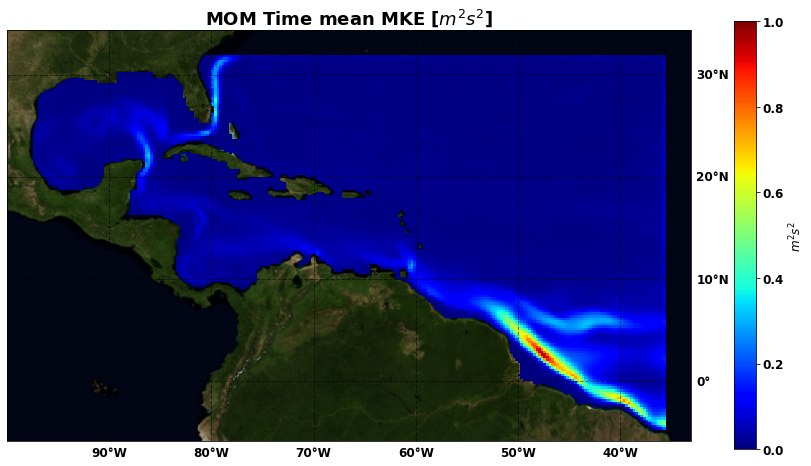

In [7]:
img = plt.imread('./'+earth)
img_extent = (-180, 180, -90, 90)

figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
# ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
# ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im = ax1.pcolormesh(ds.xh,ds.yh,eke_avg[:,:],cmap='jet',vmin=0, vmax=0.1)
cb1 = plt.colorbar(im, ticks=[0,0.02,0.04,0.06,0.08,0.1],shrink=0.5)
cb1.ax.tick_params(labelsize= 12)
cb1.ax.yaxis.set_tick_params(color='k')
cb1.set_label('$m^{2} s^{2}$', color='k', fontsize=12,fontweight="bold")
for tick in cb1.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('MOM Time mean EKE [$m^{2} s^{2}$]',fontweight='bold',fontsize=18)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb1.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb1.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_eke + out_name_mean_eke_mom)


figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im2 = ax2.pcolormesh(ds.xh,ds.yh,mke_avg[:,:],cmap='jet',vmin=0, vmax=1)
cb2 = plt.colorbar(im2, ticks=[0,0.2,0.4,0.6,0.8,1],shrink=0.5)
cb2.ax.tick_params(labelsize= 12)
cb2.ax.yaxis.set_tick_params(color='k')
cb2.set_label('$m^{2} s^{2}$', color='k', fontsize=12,fontweight="bold")
for tick in cb2.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('MOM Time mean MKE [$m^{2} s^{2}$]',fontweight='bold',fontsize=18)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb2.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb2.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_eke + out_name_mean_mke_mom)

In [8]:
# do same for GLORYS data:
glor = xr.open_mfdataset(sorted(glob(os.path.join(f'/glade/scratch/gseijo/glorys/glorys_200*.nc'))),concat_dim='time',combine='nested')

In [9]:
#subset from 2004-2010
#glor=glor.sel(time=slice('2004-01-01', '2009-12-31'))
#regrid onto mom6:
target = (
        xr.open_dataset('/glade/work/gseijo/GEBCO/zOutput_025/orig/caribean_edited_nopacific/ocean_hgrid.nc')
        [['x', 'y']]
        .isel(nxp=slice(1, None, 2), nyp=slice(1, None, 2))
        .rename({'y': 'lat', 'x': 'lon', 'nxp': 'xh', 'nyp': 'yh'})
    )
regrid_kws = dict(method='bilinear', reuse_weights=False, periodic=False)
ds_regridder = xesmf.Regridder(glor, target, filename='regridding.nc', **regrid_kws)
glor_regrid = ds_regridder(glor)

In [10]:
u = glor_regrid.uo_glor[0,:,:,:].values
v = glor_regrid.vo_glor[0,:,:,:].values

u = u[:,:,:]
v = v[:,:,:]

u2 = u * u
v2 = v * v

uavg = np.nanmean(u,axis=0)
vavg = np.nanmean(v,axis=0)

eke = 0.5 * ((u - uavg)**2 + (v - vavg)**2)
mke = 0.5 * (u2 + v2)   

geke_avg = np.nanmean(eke,axis=0)
gmke_avg = np.nanmean(mke,axis=0)  

/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  
/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


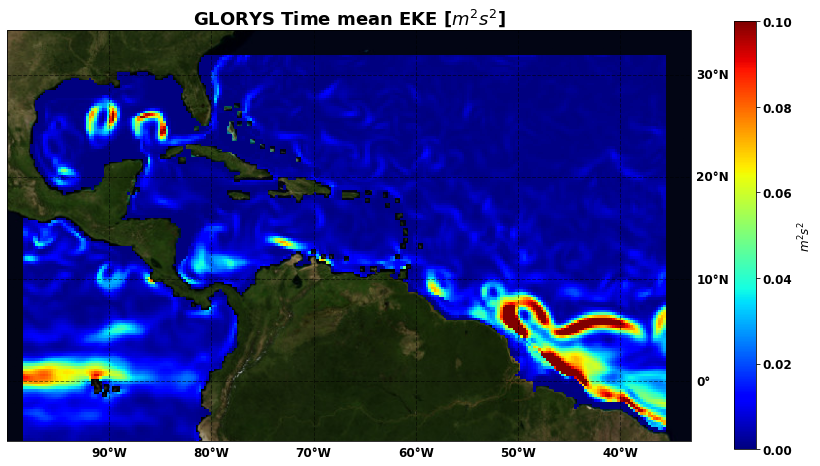

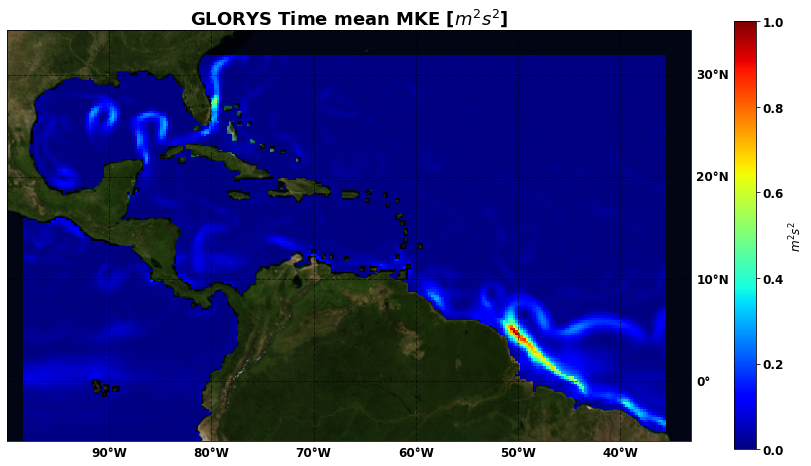

In [15]:
img = plt.imread('./'+earth)
img_extent = (-180, 180, -90, 90)

figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
# ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
# ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im = ax1.pcolormesh(ds.xh,ds.yh,geke_avg[:,:],cmap='jet',vmin=0, vmax=0.1)
cb1 = plt.colorbar(im, ticks=[0,0.02,0.04,0.06,0.08,0.1],shrink=0.5)
cb1.ax.tick_params(labelsize= 12)
cb1.ax.yaxis.set_tick_params(color='k')
cb1.set_label('$m^{2} s^{2}$', color='k', fontsize=12,fontweight="bold")
for tick in cb1.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('GLORYS Time mean EKE [$m^{2} s^{2}$]',fontweight='bold',fontsize=18)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb1.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb1.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_eke + out_name_mean_eke_glorys)


figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im2 = ax2.pcolormesh(ds.xh,ds.yh,gmke_avg[:,:],cmap='jet',vmin=0, vmax=1)
cb2 = plt.colorbar(im2, ticks=[0,0.2,0.4,0.6,0.8,1],shrink=0.5)
cb2.ax.tick_params(labelsize= 12)
cb2.ax.yaxis.set_tick_params(color='k')
cb2.set_label('$m^{2} s^{2}$', color='k', fontsize=12,fontweight="bold")
for tick in cb2.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('GLORYS Time mean MKE [$m^{2} s^{2}$]',fontweight='bold',fontsize=18)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb2.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb2.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_eke + out_name_mean_mke_glorys)


array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.00400556,
         0.00514779, 0.00786585],
        [       nan,        nan,        nan, ..., 0.00502896,
         0.00672364, 0.01152181],
        [       nan,        nan,        nan, ..., 0.0074256 ,
         0.00861202, 0.01457159]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.00922183,
         0.01266605, 0.01888156],
        [   

In [13]:
#seasonal EKE/MKE MOM6: 

mom_eke_winter = eke.sel(iMONTH=[11,0,1])
mom_eke_winter = mom_eke_winter.mean(axis=0)

#mom_eke_summer = eke.sel(iMONTH=[11,0,1])
#argo_mld_winter = argo_mld_winter.mld_dt_mean.mean(axis=0)


#argo_mld_winter = argo_mld_regrid.sel(iMONTH=[11,0,1])
#argo_mld_winter = argo_mld_winter.mld_dt_mean.mean(axis=0)

AttributeError: 'numpy.ndarray' object has no attribute 'sel'

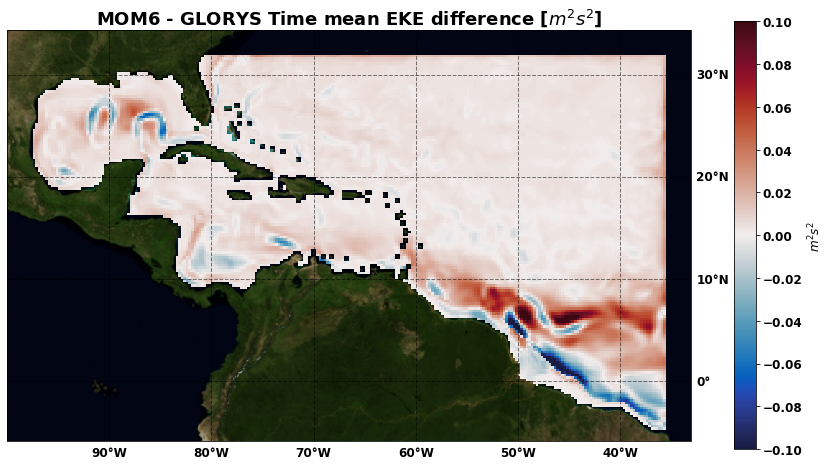

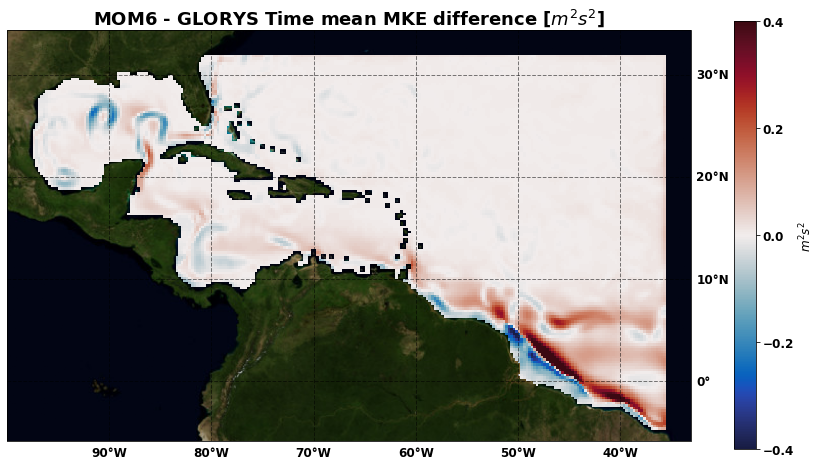

In [16]:
# EKE and MKE dif mom - glorys
img = plt.imread('./'+earth)
img_extent = (-180, 180, -90, 90)

figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
# ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
# ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im = ax1.pcolormesh(ds.xh,ds.yh,eke_avg[:,:]-geke_avg[:,:],cmap=cmo.balance,vmin=-0.1, vmax=0.1)
cb1 = plt.colorbar(im,shrink=0.5,ticks=[-0.1,-.08,-.06,-.04,-.02,0,0.02,0.04,0.06,0.08,0.1])
cb1.ax.tick_params(labelsize= 12)
cb1.ax.yaxis.set_tick_params(color='k')
cb1.set_label('$m^{2} s^{2}$', color='k', fontsize=12,fontweight="bold")
for tick in cb1.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('MOM6 - GLORYS Time mean EKE difference [$m^{2} s^{2}$]',fontweight='bold',fontsize=18)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb1.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb1.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_eke + out_name_mean_eke_dif_glorys_mom)


figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im2 = ax2.pcolormesh(ds.xh,ds.yh,mke_avg[:,:]-gmke_avg[:,:],cmap=cmo.balance,vmin=-0.4, vmax=0.4)
cb2 = plt.colorbar(im2,shrink=0.5,ticks=[-.4,-.2,0,.2,.4])
cb2.ax.tick_params(labelsize= 12)
cb2.ax.yaxis.set_tick_params(color='k')
cb2.set_label('$m^{2} s^{2}$', color='k', fontsize=12,fontweight="bold")
for tick in cb2.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('MOM6 - GLORYS Time mean MKE difference [$m^{2} s^{2}$]',fontweight='bold',fontsize=18)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb2.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb2.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_eke + out_name_mean_mke_dif_glorys_mom)


In [19]:
mom_mld_avg = ds.mlotst.values.mean(axis=0)
glor_mld_avg = np.nanmean(glor_regrid.mlotst_glor[:,:,:].values,axis=0)

/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


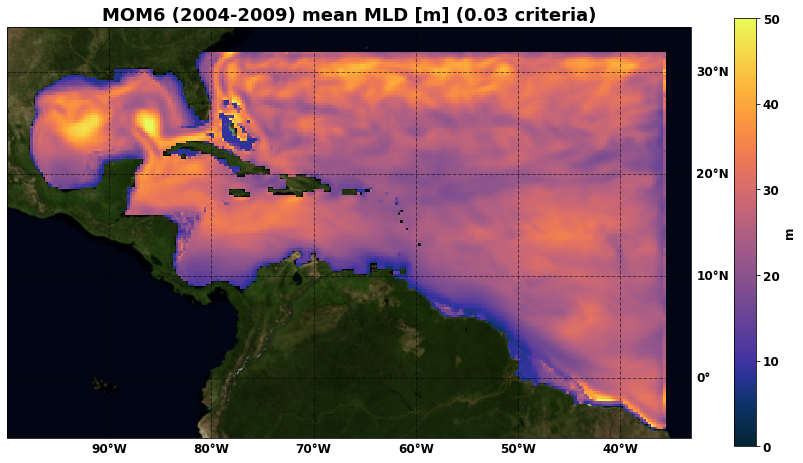

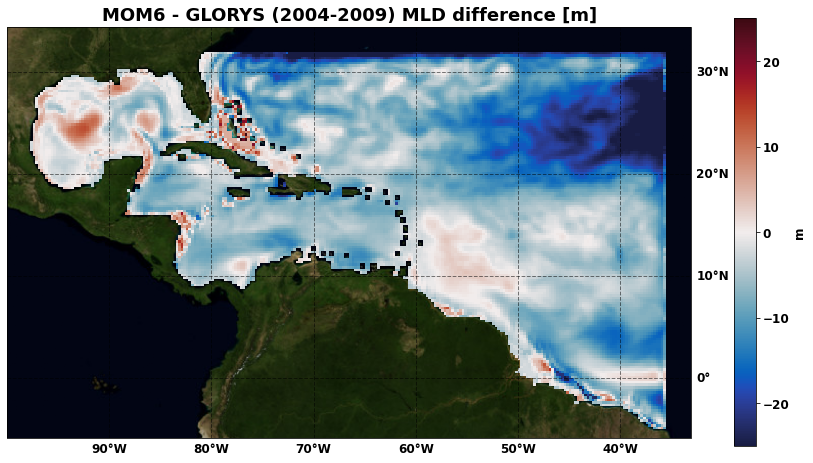

In [20]:
# mixed layer depth. and dif:
img = plt.imread('./'+earth)
img_extent = (-180, 180, -90, 90)

figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im = ax1.pcolormesh(ds.xh,ds.yh,mom_mld_avg,cmap=cmo.thermal,vmin=0, vmax=50)
cb1 = plt.colorbar(im,shrink=0.5,ticks=[0,10,20,30,40,50])
cb1.ax.tick_params(labelsize= 12)
cb1.ax.yaxis.set_tick_params(color='k')
cb1.set_label('m', color='k', fontsize=12,fontweight="bold")
for tick in cb1.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('MOM6 (2004-2009) mean MLD [m] (0.03 criteria)',fontweight='bold',fontsize=18)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb1.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb1.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_mld + 'mom6_mld.png')


figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im2 = ax2.pcolormesh(ds.xh,ds.yh,mom_mld_avg-glor_mld_avg,cmap=cmo.balance,vmin=-25, vmax=25)
cb2 = plt.colorbar(im2,shrink=0.5)#,ticks=[-.4,-.2,0,.2,.4])
cb2.ax.tick_params(labelsize= 12)
cb2.ax.yaxis.set_tick_params(color='k')
cb2.set_label('m', color='k', fontsize=12,fontweight="bold")
for tick in cb2.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('MOM6 - GLORYS (2004-2009) MLD difference [m]',fontweight='bold',fontsize=18)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb2.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb2.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_mld + 'glorys_mom6_mld_dif.png')



In [21]:
#load argo mld:
argo_mld = xr.open_dataset('/glade/scratch/gseijo/argo_ML_holte/Argo_mixedlayers_monthlyclim_04142022.nc').rename({'iLON':'longitude','iLAT':'latitude'})
argo_mld = argo_mld.sel(longitude=slice(80,150),latitude=slice(80,130))

In [22]:
ds_regridder = xesmf.Regridder(argo_mld, xr.open_dataset('/glade/work/gseijo/GEBCO/zOutput_025/orig/caribean_edited_nopacific/ocean_hgrid.nc')[['x', 'y']].isel(nxp=slice(1, None, 2), nyp=slice(1, None, 2)).rename({'y': 'lat', 'x': 'lon', 'nxp': 'xh', 'nyp': 'yh'}), filename='regridding.nc', **regrid_kws)
argo_mld_regrid = ds_regridder(argo_mld)
argo_mld_regrid=argo_mld_regrid.mld_dt_mean.mean(axis=0)



/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


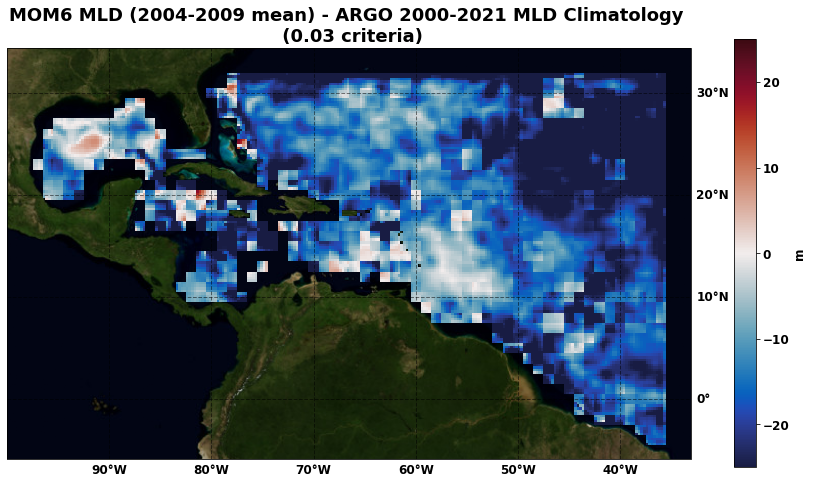

In [24]:
figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im2 = ax2.pcolormesh(ds.xh,ds.yh,mom_mld_avg-argo_mld_regrid,cmap=cmo.balance,vmin=-25, vmax=25)
cb2 = plt.colorbar(im2,shrink=0.5)#,ticks=[-.4,-.2,0,.2,.4])
cb2.ax.tick_params(labelsize= 12)
cb2.ax.yaxis.set_tick_params(color='k')
cb2.set_label('m', color='k', fontsize=12,fontweight="bold")
for tick in cb2.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('MOM6 MLD (2004-2009 mean) - ARGO 2000-2021 MLD Climatology \n (0.03 criteria)',fontweight='bold',fontsize=18)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb2.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb2.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_mld + 'argo_mom6_mld_dif.png')

In [ ]:
# mld dif winter and summer

In [25]:
mom_mld_seas=ds.groupby('time.season').mean('time')#mlotst
mom_mld_winter=mom_mld_seas["mlotst"].sel(season='DJF')
mom_mld_summer = mom_mld_seas["mlotst"].sel(season='JJA')

In [26]:
ds_regridder = xesmf.Regridder(argo_mld, xr.open_dataset('/glade/work/gseijo/GEBCO/zOutput_025/orig/caribean_edited_nopacific/ocean_hgrid.nc')[['x', 'y']].isel(nxp=slice(1, None, 2), nyp=slice(1, None, 2)).rename({'y': 'lat', 'x': 'lon', 'nxp': 'xh', 'nyp': 'yh'}), filename='regridding.nc', **regrid_kws)
argo_mld_regrid = ds_regridder(argo_mld)

argo_mld_winter = argo_mld_regrid.sel(iMONTH=[11,0,1])
argo_mld_winter = argo_mld_winter.mld_dt_mean.mean(axis=0)

argo_mld_summer = argo_mld_regrid.sel(iMONTH=[5,6,7])
argo_mld_summer = argo_mld_summer.mld_dt_mean.mean(axis=0)

/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


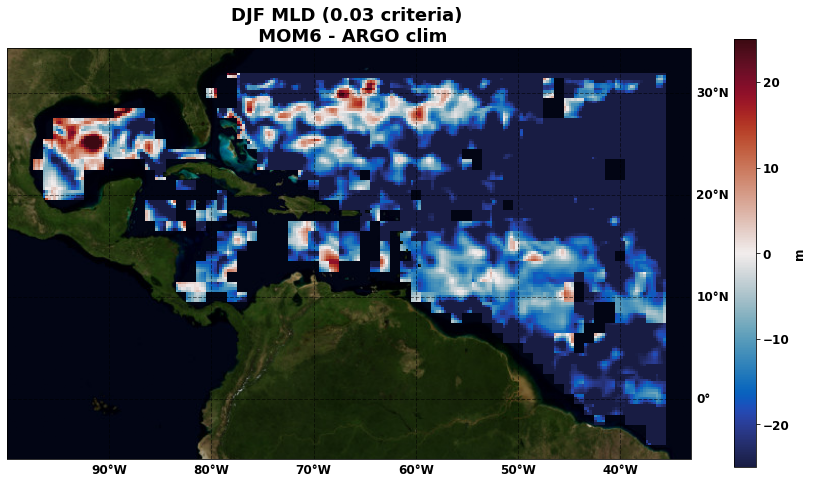

In [28]:
figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im2 = ax2.pcolormesh(ds.xh,ds.yh,mom_mld_winter-argo_mld_winter,cmap=cmo.balance,vmin=-25, vmax=25)
cb2 = plt.colorbar(im2,shrink=0.5)#,ticks=[-.4,-.2,0,.2,.4])
cb2.ax.tick_params(labelsize= 12)
cb2.ax.yaxis.set_tick_params(color='k')
cb2.set_label('m', color='k', fontsize=12,fontweight="bold")
for tick in cb2.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('DJF MLD (0.03 criteria) \n MOM6 - ARGO clim',fontweight='bold',fontsize=18)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb2.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb2.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_mld + 'argo_mom6_mld_dif_DJF.png')

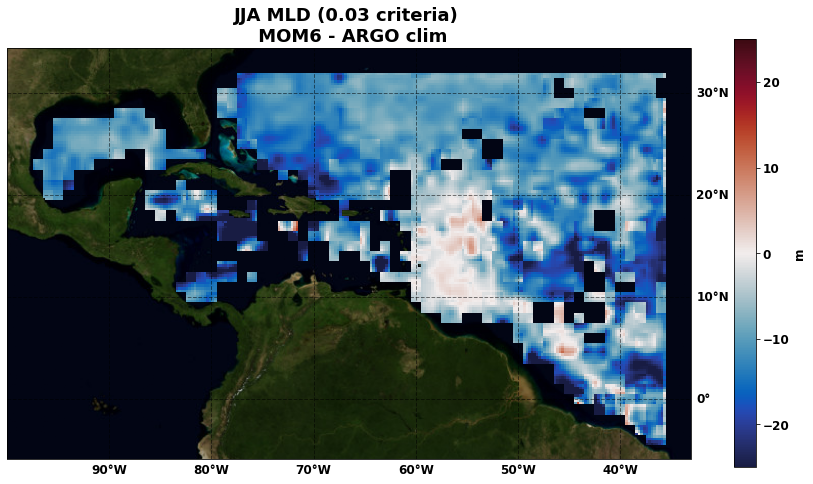

In [30]:
figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax2 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=200)
im2 = ax2.pcolormesh(ds.xh,ds.yh,mom_mld_summer-argo_mld_summer,cmap=cmo.balance,vmin=-25, vmax=25)
cb2 = plt.colorbar(im2,shrink=0.5)#,ticks=[-.4,-.2,0,.2,.4])
cb2.ax.tick_params(labelsize= 12)
cb2.ax.yaxis.set_tick_params(color='k')
cb2.set_label('m', color='k', fontsize=12,fontweight="bold")
for tick in cb2.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('bold')
plt.title ('JJA MLD (0.03 criteria) \n MOM6 - ARGO clim',fontweight='bold',fontsize=18)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size':12,'color': 'black', 'weight': 'bold'}
cb2.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb2.ax.axes, 'yticklabels'), color='k')
plt.savefig(out_dir_mld + 'argo_mom6_mld_dif_JJA.png')